<a id='section0'></a>

# Welcome to pyCardiac!

This notebook demonstrates various 1D pyCardiac features. Full list of them below:

* 1. <a href="#section1" > Metrics </a>
    * 1.1.<a href="#section1.1" >Standard deviation (SD) calculation </a>
    * 1.2. <a href="#section1.2">Sum Of Squared Differences (SSD) calculation</a>
* 2. <a href="#section2" > Routines </a>
    * 2.1. <a href="#section2.1" >Additive Gaussian White Noise (AWGN)</a>
    * 2.2. <a href="#section2.2" >Signal rescaling </a>
    * 2.3. <a href="#section2.3" >Moving average </a>
* 3. <a href="#section3" > Signal </a>
     * 3.1. <a href="#section3.1" > Analysis </a>
        * 3.1.1. <a href="#section3.1.1" >APD calculation </a>
        * 3.1.2. <a href="#section3.1.2" >Activation time calculation </a>
        * 3.1.3. <a href="#section3.1.3" >Alternance detection </a>
        * 3.1.4. <a href="#section3.1.4" >Signal-to-noise ratio </a>
     * 3.2. <a href="#section3.2" > Processing </a>
        * 3.2.1. <a href="#section3.2.1" > Autoscaling technique </a>
        * 3.2.2. <a href="#section3.2.2" > Ensemble averaging </a>
        * 3.2.3. <a href="#section3.2.3" > Baseline (drift) removal </a>
        * 3.2.4. <a href="#section3.2.4" > Baseline extraction </a>
        * 3.2.5. <a href="#section3.2.4" > Transformation to phase </a>
        * 3.2.6 <a href="#section3.2" > Filtration </a>
            * a) <a href="#section.a" > Binning </a>
            * b) <a href="#section.b" > Fourier filter </a>

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

## Single import

In [3]:
import pyCardiac as pc

<a id='section1'></a>
## 1. Metrics

Metrics below may be used to compare goodness of fit between Action Potentials via Genetic Algorithm.    
<a href="#section0" >Link back to top $\uparrow$</a>

### 1.1 SD
Calculation <a href="https://en.wikipedia.org/wiki/Standard_deviation" >Standard deviation</a> as error norm between two signals.
$$ SSD = \sqrt{\frac{1}{N}\sum_{t=0}^{N}[V_{target}(t)-V_{model}(t)]^2} $$
<a id='section1.1'></a>

Let's load two signals:

In [4]:
signal_clean = np.loadtxt("./source/AP_1000.txt")

In [5]:
signal_noisy = np.loadtxt("./source/AP_1000_with_noise.txt")

Two action potentials look like this:

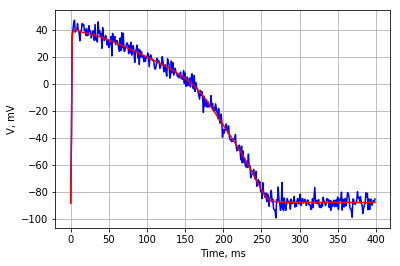

In [6]:
plt.plot(signal_noisy, 'b')
plt.plot(signal_clean, 'r')
plt.xlabel('Time, ms')
plt.ylabel('V, mV')
plt.grid()
plt.show()

Finally, calculate the standard deviation:

In [7]:
pc.metrics.norms.sd(signal_noisy, signal_clean)

3.9423099414556964

### 1.2 SSD
Sum Of Squared Differences (SSD) calculation
$$ SSD = \sum_{t=0}^{N}[V_{target}(t)-V_{model}(t)]^2 $$
<a id='section1.2'></a>

In [8]:
pc.metrics.norms.ssd(signal_noisy, signal_clean)

6216.723069800167

<a id='section2'></a>
## 2. Routines
   
<a href="#section0" >Link back to top $\uparrow$</a>

### 2.1 Additive White Gaussian Noise
<a id='section2.1'></a>

Let's say we have a signal without noise, but we want to add to it gaussian white noise for the given SNR level in dB.

In [9]:
snr_level = 15

In [10]:
new_signal = pc.routines.awgn(signal_clean, snr_level)

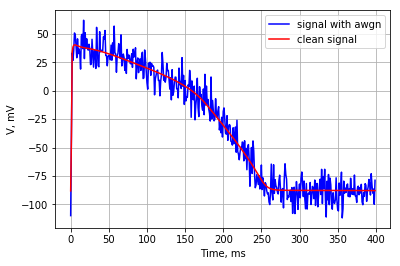

In [11]:
plt.plot(new_signal, 'b',  label = 'signal with awgn')
plt.plot(signal_clean, 'r', label = 'clean signal')
plt.xlabel('Time, ms')
plt.ylabel('V, mV')
plt.legend()
plt.grid()
plt.show()

### 2.2 Signal rescaling
Rescale signal from $v_{min}$ to $v_{max}$
<a id='section2.2'></a>

Let's set scaling range:

In [12]:
v_min = -40
v_max = 50

In [13]:
rescaled_signal = pc.routines.rescale(signal_clean, v_min, v_max)

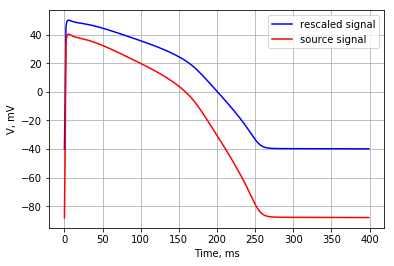

In [14]:
plt.plot(rescaled_signal, 'b',  label = 'rescaled signal')
plt.plot(signal_clean, 'r', label = 'source signal')
plt.xlabel('Time, ms')
plt.ylabel('V, mV')
plt.grid()
plt.legend()
plt.show()

### 2.3 Moving average
Moving average of the signal.
<a id='section2.3'></a>

In [15]:
window_size = 3

In [16]:
ma_signal = pc.routines.moving_average(signal_noisy, window_size)

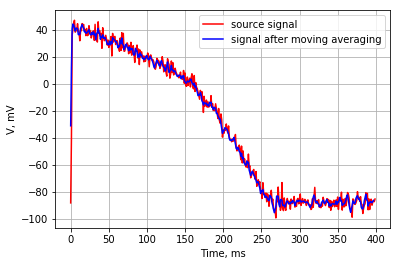

In [17]:
plt.plot(signal_noisy, 'r', label = 'source signal')
plt.plot(ma_signal, 'b',  label = 'signal after moving averaging')
plt.xlabel('Time, ms')
plt.ylabel('V, mV')
plt.grid()
plt.legend()
plt.show()

<a id='section3'></a>
## 3. Signal 
   
<a href="#section0" >Link back to top $\uparrow$</a>

In [18]:
from pyCardiac.signal.analysis import *

In [19]:
from pyCardiac.signal.processing import *

<a id='section3.1.1'></a>
### 3.1.1 APD calculation
Action Potential Duration (APD) calculation for given percentage repolarization level.    
<a href="#section0" >Link back to top $\uparrow$</a>

In [20]:
t = np.arange(len(signal_clean))

In [21]:
apd80 = calculate_APD(t, signal_clean, 80)
apd90 = calculate_APD(t, signal_clean, 90)

In [22]:
print('APD80: %.1f ms'% apd80)
print('APD90: %.1f ms'% apd90)

APD80: 236.0 ms
APD90: 247.0 ms


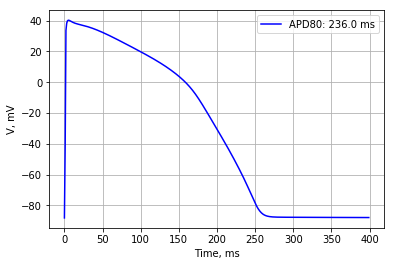

In [23]:
plt.plot(signal_clean, 'b', label = 'APD80: %.1f ms'% apd80)
plt.xlabel('Time, ms')
plt.ylabel('V, mV')
plt.legend()
plt.grid()
plt.show()

<a id='section3.1.2'></a>
### 3.1.2 Activation time calculation

In [24]:
activation_time = calculate_activation_time(t, signal_clean, 50)
print('Activation_time: %.1f ms'% activation_time)

Activation_time: 2.0 ms


<a id='section3.1.3'></a>
### 3.1.3 Alternance detection
This feature allows to detect action potential alternance and find out alternance in time units.    

In [26]:
signal_alternance = np.loadtxt("./source/AP_with_alternance.txt")

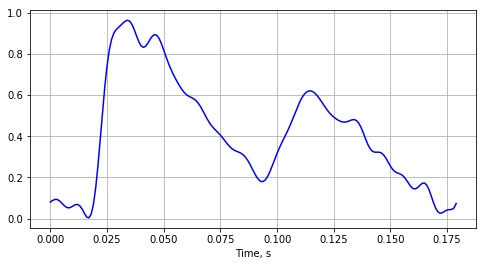

In [27]:
plt.figure(figsize=(8,4))
plt.plot(signal_alternance[:180,0], signal_alternance[:180,1], 'b')
plt.xlabel('Time, s')
plt.grid()
plt.show()

Percentage repolarization level and $APD_{min}$:

In [28]:
level = 50.
apd_min = 0.015 # in seconds!

Alternance in time units:

In [29]:
calculate_alternance(signal_alternance[:180,0], signal_alternance[:180,1], level, apd_min)

0.027000000000000003

<a id='section3.1.4'></a>
### 3.1.4 Signal-to-noise ratio (SNR)
Signal-to-noise ratio is defined as the ratio of the power of a signal to power of background noise ( <a href="https://en.wikipedia.org/wiki/Signal-to-noise_ratio" >Wiki</a> ):
$$ SNR [db] =20\cdot \log_{10} (\frac{A_{signal}}{A_{noise}})$$

In [30]:
ratio = snr(signal_noisy, signal_clean)
print('SNR: %.1f dB'% ratio)

SNR: 23.6 dB


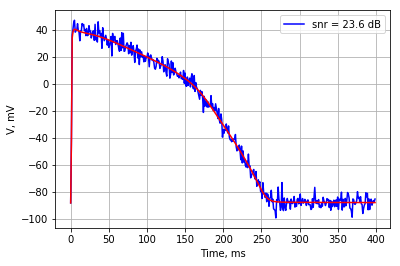

In [31]:
plt.plot(signal_noisy, 'b', label = 'snr = %.1f dB'% ratio)
plt.plot(signal_clean, 'r')
plt.xlabel('Time, ms')
plt.ylabel('V, mV')
plt.grid()
plt.legend()
plt.show()

<a id='section3.2.1'></a>
### 3.2.1 Autoscaling technique

Let's transform our original signal: stretch and move it

In [32]:
signal_transformed = 0.65 * signal_clean - 10.

Compare with the original signal:

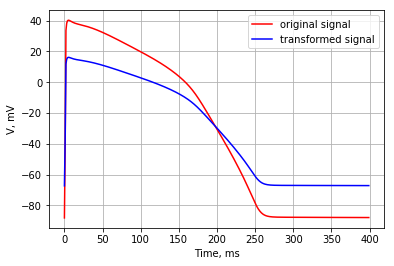

In [33]:
plt.plot(signal_clean, 'r', label = 'original signal')
plt.plot(signal_transformed, 'b',  label = 'transformed signal')
plt.xlabel('Time, ms')
plt.ylabel('V, mV')
plt.grid()
plt.legend()
plt.show()

Thanks to the autoscaling function we can make two signals identical again! Autoscaling function minimizes the error (Standard Deviation) between two signals and returns rescaled signal and SD value:

In [34]:
rescaled_signal, sd = autoscaling(signal_transformed, signal_clean)

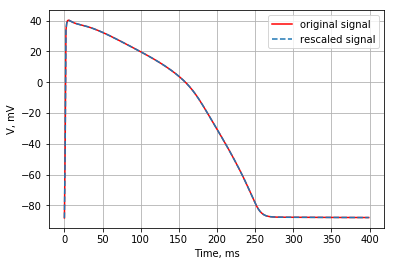

In [37]:
plt.plot(signal_clean, 'r', label = 'original signal')
plt.plot(rescaled_signal, '--',  label = 'rescaled signal')
plt.xlabel('Time, ms')
plt.ylabel('V, mV')
plt.grid()
plt.legend()
plt.show()

In [38]:
print('SD: %.14f mV'% sd)

SD: 0.00000000000004 mV


<a id='section3.2.2'></a>
### 3.2.2 Ensemble averaging
Ensemble averaging effectively reduces noise amplitude.

Original recording:

In [39]:
signal_125ms = np.loadtxt("./source/AP_125ms.txt")

In [40]:
time, v = signal_125ms[85:,0], signal_125ms[85:,1]

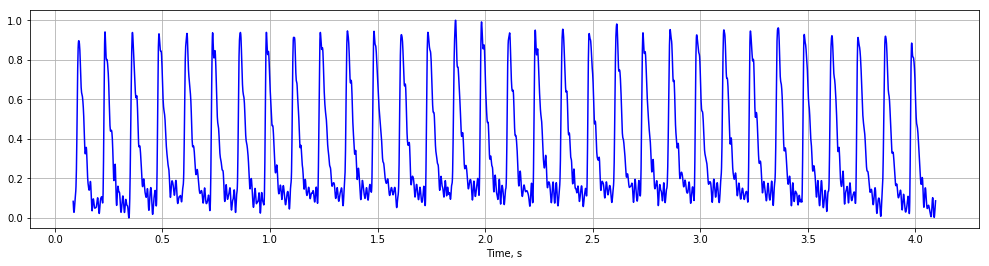

In [41]:
plt.figure(figsize=(17,4))
plt.plot(time, v, 'b')
plt.xlabel('Time, s')
plt.grid()
plt.show()

Cycle length:

In [42]:
CL = 0.125 # s

In [43]:
time_space, signal_averaged = ensemble_average(time, v, CL)

Now we have averaged action potential:

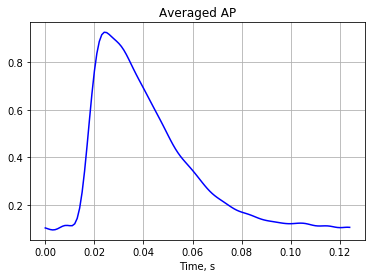

In [44]:
plt.title('Averaged AP')
plt.plot(time_space, signal_averaged, 'b')
plt.xlabel('Time, s')
plt.grid()
plt.show()

<a id='section3.2.3'></a>
### 3.2.3 Baseline (drift) removal
Let's remove baseline drift from optical action potentials recording. The function takes one of two methods as input: 'least squares' or 'linear' method.

We will use least squares method:

In [45]:
method_name = 'least_squares'

In [46]:
signal_without_drift = remove_baseline(v, method_name)

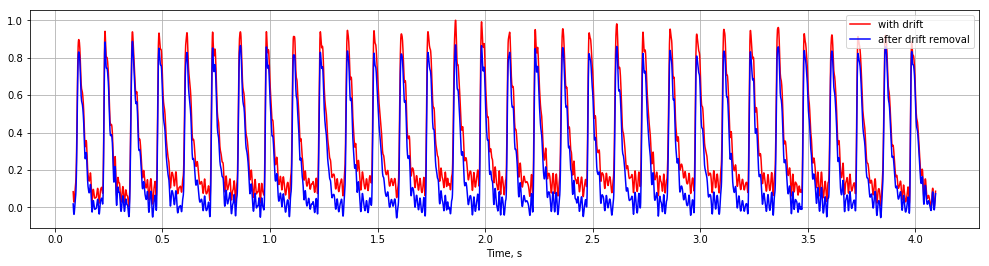

In [47]:
plt.figure(figsize=(17,4))
plt.plot(time, v, 'r', label = 'with drift')
plt.plot(time, signal_without_drift, 'b', label = 'after drift removal')
plt.xlabel('Time, s')
plt.legend()
plt.grid()
plt.show()

<a id='section3.2.4'></a>
### 3.2.4 Baseline extraction 


In [48]:
lam = 1e6    # Smoothness parameter
p = 0.01     # Asymmetry parameter
niter = 10   # Number of iterations

In [49]:
drift_before = baseline_als(v, lam, p, niter)

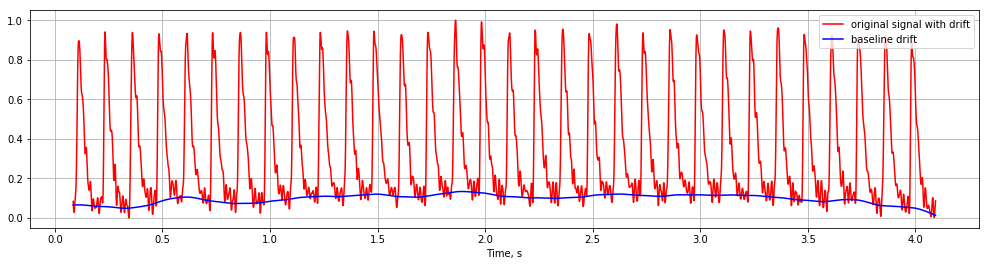

In [50]:
plt.figure(figsize=(17,4))
plt.plot(time, v, 'r', label = 'original signal with drift')
plt.plot(time, drift_before, 'b', label = 'baseline drift')
plt.xlabel('Time, s')
plt.legend()
plt.grid()
plt.show()

Now compare with the signal from which we removed the drift via least squares method:

In [51]:
drift_after = baseline_als(signal_without_drift, lam, p, niter)

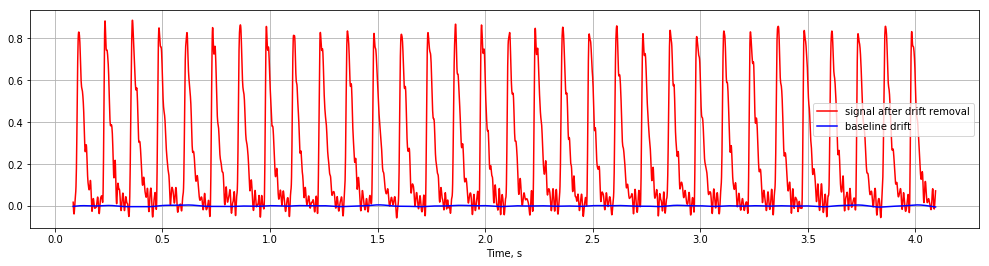

In [52]:
plt.figure(figsize=(17,4))
plt.plot(time, signal_without_drift, 'r', label = 'signal after drift removal')
plt.plot(time, drift_after, 'b', label = 'baseline drift')
plt.xlabel('Time, s')
plt.legend()
plt.grid()
plt.show()

<a id='section3.2.5'></a>
### 3.2.5 Signal transformation to phase 

In [55]:
phase = transform_to_phase(v)

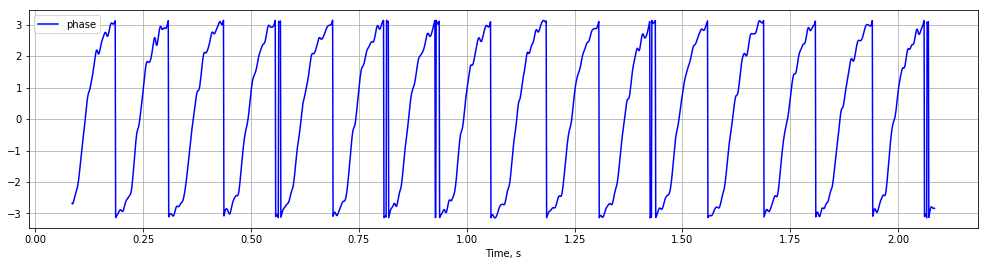

In [57]:
plt.figure(figsize=(17,4))
plt.plot(time[:2000], phase[:2000], 'b', label = 'phase')
plt.xlabel('Time, s')
plt.legend()
plt.grid()
plt.show()

<a id='section3.2.6'></a>
### 3.2.6 Filtration 

In [58]:
from pyCardiac.signal.processing.filtration import *

<a id='section.a'></a>
#### a) Binning

Let's create a mask for binning:

In [59]:
n = 101 

In [60]:
kernel = pc.routines.kernel_gaussian(n, 10)
mask = np.roll((kernel > 1e-4), 15)

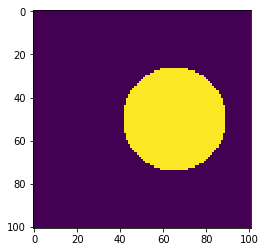

In [61]:
plt.imshow(mask)
plt.show()

Create data for binning:

In [62]:
data = np.random.random(n*n)
data[data < 0.8] = 0
data.shape = (n,n)

Will use uniform and gaussian kernels for binning technique:

In [65]:
kernel_size = 9
uniform_binning = binning(data, kernel_size, 'uniform', mask)
gaussian_binning = binning(data, kernel_size, 'gaussian', mask)

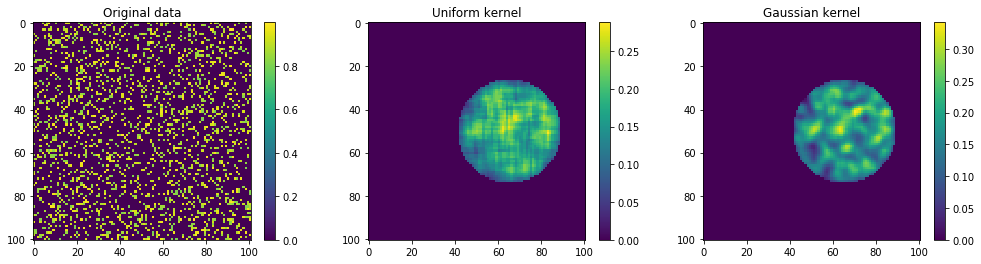

In [66]:
plt.figure(figsize=(17,4))

plt.subplot(131)
plt.title('Original data')
plt.imshow(data)
plt.colorbar()

plt.subplot(132)
plt.title('Uniform kernel')
plt.imshow(uniform_binning)
plt.colorbar()

plt.subplot(133)
plt.title('Gaussian kernel')
plt.imshow(gaussian_binning)
plt.colorbar()

plt.show()

<a id='section.b'></a>
#### b) Fourier filter (work in progress)

In [67]:
Fs = 1000

In [68]:
signal = fourier_filter(v, Fs, [0,100], [61,59])

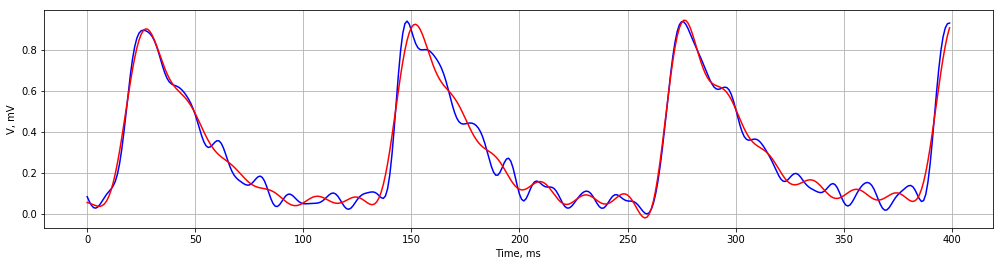

In [69]:
plt.figure(figsize=(17,4))
plt.plot(v[:400], 'b', label = 'original signal')
plt.plot(signal[:400], 'r', label = 'after filtration')
plt.xlabel('Time, ms')
plt.ylabel('V, mV')
plt.grid()
plt.show()